# Plotting L95 outputs. Results from running L95-truth.

#### Loading Python modules:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from IPython import display
import glob

#### Open L95 output files:

In [108]:
# Define the function to read the data from the file:
def read_file(filename):
    time_frame = filename.split('/')[-1].split('.')[-2]
    with open(filename, "r") as infile:
        n = int(infile.readline().strip())
        time = infile.readline().strip()
        values_str = infile.readline()
    values_list = values_str.split()
    values = np.zeros((int(n), 1))
    cnt = 0
    for i in range(int(n)):
        values[i] = float(values_list[cnt])
        cnt += 1
    return n, time, time_frame, values
        

#### Loading data:

In [ ]:
# Define the root of the file name:
file_root = '/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.'

# Read the data from the files:
num_times = 100
num_pts = 40
u = np.zeros((num_pts, num_times))
times = []
for it in range(num_times):
    if it==0:
        filename = file_root +  "PT0S.l95"
    else:
        filename = file_root + "P" + str(it+1) + "D.l95"
    print(filename)
    n, time, time_frame, values = read_file(filename)
    u[:, it] = values[: ,0]
    times.append(time_frame)



/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.PT0S.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P2D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P3D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P4D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P5D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P6D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P7D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T00:00:00Z.P8D.l95
/Users/diegocarrio/Dropbox/JEDI_NOAA_Project/JEDI/oops/build/l95/test/Data/truth.fc.2010-01-01T

#### Plotting results and saving as GIF

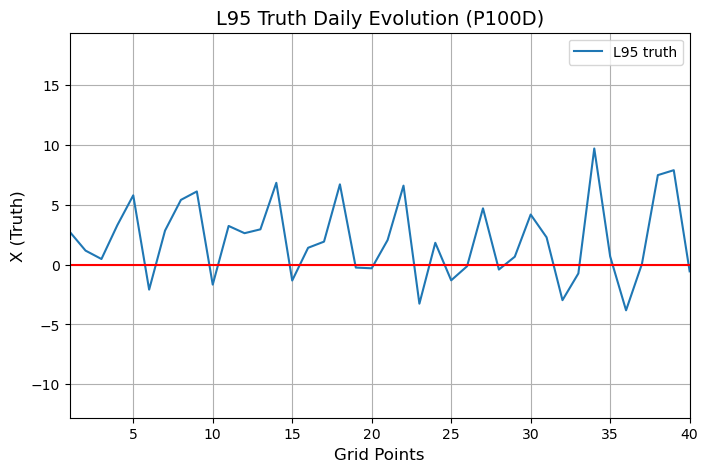

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Data:
num_grid_points, num_time_steps  = u.shape

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# X-axis for grid points
x = np.arange(1, num_grid_points + 1)

# Plot initialization
line, = ax.plot(x, u[:, 0], label='L95 truth')

# Customize the plot
ax.axhline(y=0.0, c='red')
ax.set_xlabel('Grid Points', fontsize=12)
ax.set_ylabel('X (Truth)', fontsize=12)
ax.set_title('Evolution of Grid Points Over Time', fontsize=14)
ax.set_xlim(1, num_grid_points)
ax.set_ylim(u.min() - 1, u.max() + 1)  # Adjust to fit data range
ax.grid(True)
ax.legend(loc='upper right')

# Animation function
def update(frame):
    """
    Updates the plot for each time step.
    """
    line.set_ydata(u[:,frame])  # Update the y-data for the current frame
    # update title:
    ax.set_title(f'L95 Truth Daily Evolution ({times[frame]})', fontsize=14)
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=num_time_steps, blit=True, interval=100
)

# Save the animation as a GIF using Pillow
ani.save('grid_evolution.gif', writer='pillow', fps=1)

# Display the plot
plt.show()
fig.savefig('grid_evolution.png')
